In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [54]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [55]:
X_train.shape

(60000, 28, 28)

In [56]:
X_test.shape

(10000, 28, 28)

In [57]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [58]:
# (0 - 255)
# r g b = (0,0,0) = black
# (255,255,255) = white

In [59]:
# for idx in range(0,10):
#     plt.matshow(X_train[idx])

In [60]:
y_train[9]

np.uint8(4)

In [61]:
X_train = X_train/255
X_test = X_test/255

In [62]:
# X_train_reshaped = X_train.reshape(len(X_train) , 28*28) # (60000 , )
# X_test_reshaped = X_test.reshape(len(X_test) , 28*28)

In [63]:
# X_train_reshaped.shape

In [64]:
# from sklearn.preprocessing import StandardScaler
# st = StandardScaler()
# X_train = st.fit_transform(X_train_reshaped)
# X_test = st.fit_transform(X_test_reshaped)

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100,activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\bisho\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [67]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [68]:
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9152 - loss: 0.2951
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9594 - loss: 0.1417
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9708 - loss: 0.0993
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0569


In [85]:
import numpy as np

weights = model.get_weights()

# اطبع القيم للـ Layer الأخيرة
last_W = weights[-2]
last_b = weights[-1]

print("آخر W (قيم):")
print(last_W)  # دي مصفوفة شكلها (100, 10)
print("\nآخر b (قيم):")
print(last_b)  # دي مصفوفة شكلها (10,)


آخر W (قيم):
[[-2.44385093e-01 -4.89940107e-01  2.83692796e-02  2.66527832e-01
  -4.58235174e-01 -3.20223570e-01  6.23002410e-01 -2.41627097e-01
   2.00921372e-01  5.49967028e-02]
 [-3.03281456e-01 -2.63648182e-01  2.07069725e-01  3.50572854e-01
  -8.82266164e-02  2.82100111e-01 -2.68262684e-01  2.74398983e-01
  -8.14684778e-02 -3.10505748e-01]
 [-2.68326253e-01  5.15644729e-01  2.07036540e-01  4.57444906e-01
   4.04048562e-01 -8.83081734e-01  7.25846514e-02 -9.52368528e-02
  -9.62313488e-02 -1.35471642e-01]
 [ 2.42492929e-01 -4.57675382e-02  5.32780886e-01  2.45051324e-01
   3.37714404e-01  8.47741142e-02  3.40498596e-01 -3.81934226e-01
  -1.36022285e-01 -2.52910376e-01]
 [-2.78107136e-01  1.30459458e-01 -5.59444189e-01 -5.51890850e-01
  -4.39949512e-01  3.87492329e-01  3.87453020e-01 -2.52100557e-01
   3.15714300e-01  3.56119126e-01]
 [-5.17648757e-01 -5.17055020e-02 -5.64307272e-01  2.13758141e-01
   3.37609112e-01 -1.22683190e-01  4.52545546e-02  5.06274104e-01
   6.94045305e-01  1

In [69]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0853


[0.08529727160930634, 0.9728000164031982]

In [70]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [71]:
y_test[0]

np.uint8(7)

In [72]:
np.argmax(y_pred[0])

np.int64(7)

In [73]:
y_pred = [np.argmax(i) for i in y_pred]

In [74]:
cm = tf.math.confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truth')

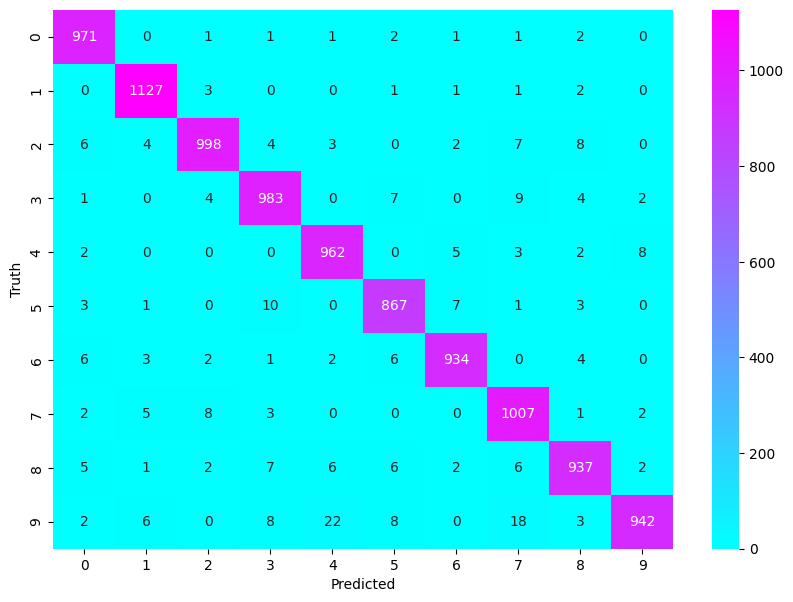

In [75]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d' , cmap='cool')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
X_test[0][0][0] = 1
X_test[0][0][1] = 0.99

X_test[0][0][2] = 0.99
X_test[0][0][8] = 0.99
X_test[0][0][6] = 0.99
X_test[0][0][7] = 0.99


In [77]:
np.argmax(model.predict(X_test)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.int64(7)

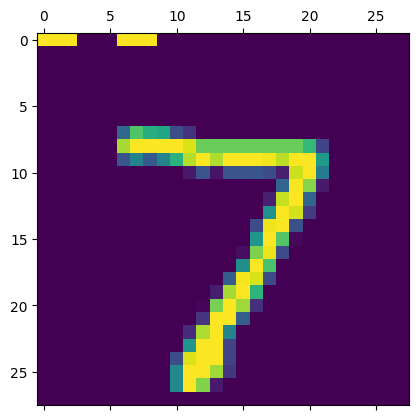

In [78]:
plt.matshow(X_test[0])